Az alábbi lekérdezés megmutatja, hogy mikor történt a legkésőbb és legkorábbi szállítás valamint rendelés. Jól látható, hogy a legkorábbi rendelés hamarabb volt mint a legkorábbi szállítás és a legkésőbbi rendelesi szintén korábban volt mint a legkésőbbi szállítás.

In [24]:
SELECT 
    MIN(REND_DATUM) AS Legkorabbi_rendeles, 
    MAX(REND_DATUM) AS Legkesobbi_rendeles,
    MIN(SZALL_DATUM) AS Legkorabbi_szallitas,
    MAX(SZALL_DATUM) AS Legkesobbi_szallitas,
    count(distinct [LOGIN]) as Egyedi_azonositok_szama
FROM dbo.Rendeles;


(1 row affected)

Total execution time: 00:00:00.044

Legkorabbi_rendeles,Legkesobbi_rendeles,Legkorabbi_szallitas,Legkesobbi_szallitas,Egyedi_azonositok_szama
2015-05-01,2017-04-01,2015-05-03,2017-04-11,191


Az alábbi lekérdezés megnézi, hogy a LOGIN, SZALL\_CIM és SZAMLA\_CIM oszlopokban mennyi nulla található. Látható, hogy az utóbbi kettő oszlopban a nullák aránya nagyon magas, ezzel szemben a LOGIN oszlopban mindenhol szerepel valamilyen érték.

In [25]:
SELECT 
    'LOGIN' AS Vizsgalt_oszlopok, 
    COUNT(*) AS Osszes_sor, 
    SUM(CASE WHEN LOGIN IS NULL THEN 1 ELSE 0 END) AS Nullak_szama
FROM dbo.Rendeles
UNION ALL
SELECT 
    'SZALL_CIM', COUNT(*),
    SUM(CASE WHEN SZALL_CIM IS NULL THEN 1 ELSE 0 END)
FROM dbo.Rendeles
UNION ALL
SELECT 
    'SZAMLA_CIM', COUNT(*),
    SUM(CASE WHEN SZAMLA_CIM IS NULL THEN 1 ELSE 0 END)   
FROM dbo.Rendeles

(3 rows affected)

Total execution time: 00:00:00.038

Vizsgalt_oszlopok,Osszes_sor,Nullak_szama
LOGIN,28085,0
SZALL_CIM,28085,21689
SZAMLA_CIM,28085,25535


Rendelések száma hónaponként.

In [26]:
SELECT 
    YEAR(REND_DATUM) AS ev, 
    MONTH(REND_DATUM) AS honap, 
    COUNT(*) AS rendelesek_szama
FROM dbo.Rendeles
GROUP BY YEAR(REND_DATUM), MONTH(REND_DATUM)
ORDER BY ev, honap;

(24 rows affected)

Total execution time: 00:00:00.039

ev,honap,rendelesek_szama
2015,5,1203
2015,6,1155
2015,7,1235
2015,8,1276
2015,9,1207
2015,10,1233
2015,11,1178
2015,12,1260
2016,1,1226
2016,2,1193


A 15 legtöbb rendelést kapó nap.

In [27]:
SELECT top 15
    REND_DATUM as rendelesi_nap, 
    COUNT(*) AS rendelesek_szama
FROM dbo.Rendeles
GROUP BY REND_DATUM
ORDER BY rendelesek_szama DESC

(15 rows affected)

Total execution time: 00:00:00.026

rendelesi_nap,rendelesek_szama
2015-12-02,52
2015-08-05,50
2016-04-19,50
2016-05-07,50
2015-07-26,50
2016-11-25,49
2015-09-11,49
2015-11-30,49
2015-10-10,49
2016-04-02,49


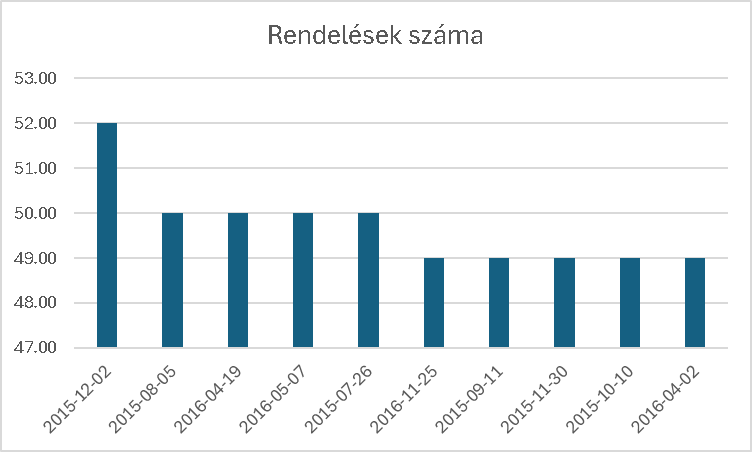

Az alábbi lekérdezés és diagram jól szemlélteti a fizetési módok közötti megoszlást. Jól látható, hogy szinte egyenletes az eloszlás az értékek között (közel 1/3-hoz).

In [28]:
SELECT
    SZALL_MOD AS szallitas_mod, 
    COUNT(*) darabszam,
    CAST(ROUND((COUNT(*) * 100.0) / (SELECT COUNT(*) FROM dbo.Rendeles WHERE SZALL_MOD IS NOT NULL), 2) AS DECIMAL(5,2)) as szazalekos_megoszlas -- % formátumat nagyon csúnya volt ezért átalakítottam (round utána pl.: 33.7100000)
from dbo.Rendeles
WHERE SZALL_MOD IS NOT null
GROUP BY SZALL_MOD
ORDER BY COUNT(*) desc

(3 rows affected)

Total execution time: 00:00:00.045

szallitas_mod,darabszam,szazalekos_megoszlas
Személyes átvétel,9468,33.71
GLS,9426,33.56
Posta,9191,32.73
